In [42]:
# 정규표현식
import re
# 자연어처리
from sklearn.feature_extraction.text import TfidfVectorizer
# 형태소분석
from pecab import PeCab
# 토픽모델링
from sklearn.decomposition import LatentDirichletAllocation

In [43]:
# 데이터 분석
import pandas as pd
import numpy as np

In [44]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [55]:
# 시간이 오래 걸리는 작업시 시각적으로 진행상황 수치로( %) 보여준다.
from tqdm import tqdm
tqdm.pandas()

In [46]:
# 한글만 추출 + 2개이상 공백 1개로 변환
def extract_korean(text):
    # 한글만 추출
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]','',text)
    # 공백 2개 이상인경우 1개로 변환
    text = re.sub(r'\s+',' ',text)
    return text

In [47]:
# 명사,동사,형용사 추출하기
def get_nouns_verbs_adjectives(text):
    pecab = PeCab()
    pecab_pos = pecab.pos(text)
    join_text = []
    for text,pos in pecab_pos:
        if pos.startswith('N') or pos == 'VV' or pos == 'VA':
            join_text.append(text)
    return " ".join(join_text)     

In [48]:
df = pd.read_csv('review_samples.csv',encoding='cp949',header=None)

In [65]:
df.columns=['review','team']

In [66]:
df.head()

,review,team
0,"경상남도 합천군 가야면,경상북도 성주군 가천면에걸처있는 높이 상왕봉1,430m 의 ...",1팀
1,"서산에 있는 가야산을 종주했습니다.제1,2,3 편에서는 가야산 주차장에서 산행을 시...",1팀
2,"돌아봐야 할 100대 명산 : 합천 가야산 (1,430m)산행 날짜:2023년 4...",1팀
3,"블랙야크 챌린지 83/100장소 : 경상남도 상주, 합천에 걸쳐있는 가야산 ...",1팀
4,멋진 절경을 자랑하는 가야산!!드디어 다녀왔다.인스타 찾아보니까 설산이 아주 멋있...,1팀


In [69]:
df['review2'] = df['review'].progress_map(extract_korean).progress_map(get_nouns_verbs_adjectives)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:07<00:00,  6.26s/it]


In [70]:
df.head(10)

,review,team,review2
0,"경상남도 합천군 가야면,경상북도 성주군 가천면에걸처있는 높이 상왕봉1,430m 의 ...",1팀,경상남도 합천군 가야면 경상북도 성주군 가천면 처 있 높이 왕봉 산 야산 예 조선팔...
1,"서산에 있는 가야산을 종주했습니다.제1,2,3 편에서는 가야산 주차장에서 산행을 시...",1팀,서산 있 가야산 종주 제 편 가야산 주차장 산행 시작 상가 저수지 가야산 주 능선 ...
2,"돌아봐야 할 100대 명산 : 합천 가야산 (1,430m)산행 날짜:2023년 4...",1팀,돌 명산 합천 가야산 산행 날짜 년 월 산행 코스 해인사 성보 박물관 가 야산 정상...
3,"블랙야크 챌린지 83/100장소 : 경상남도 상주, 합천에 걸쳐있는 가야산 ...",1팀,블랙 야크 챌린지 장소 경상남도 상주 합천 가야산 국립 공원 교통 안내 산악회 좋 ...
4,멋진 절경을 자랑하는 가야산!!드디어 다녀왔다.인스타 찾아보니까 설산이 아주 멋있...,1팀,절경 자랑 가야산 스타 찾아보 설산 멋있 눈 녹기 전 생각 주말 아침 출발 지난주 ...
5,#가야산 #충남가야산 #옥양봉 #석문봉 #가야봉 #등산 #fujix100v #202...,1팀,가야산 충남 가야산 옥양봉 석문봉 가 봉 등산 미세 먼지 최악 날 근교 산행 다녀오...
6,"산행일시 : 04월 11일, 10:50 ~ 15:25산행코스 : 가야산 일원날 ...",1팀,산행 일시 월 산행 코스 가야산 일원 날 흐리 비 바람 불 산행 오후 소식 있 가 ...
7,가야산 홍류동 소리 길 가야산 식당 오늘은 그동안 우한 코로나 열병으로 통상적인 산...,1팀,야산 홍 동 소리 길 가야산 식당 오늘 그동안 우한 코로나 열병 통상 산행 하 만추...
8,"가야산 일출 산행에 다녀왔다. 이 날 날씨예보는 '맑음'이라 다행이긴 했는데, 일출...",1팀,야산 일출 산행 날 날씨 예보 맑 다행 일출 시간 봉 수 있 관건 머리 수 있 몸 ...
9,"산행일시 : 02월 22일, 10:30 ~ 15:15산행코스 : 가야산 일원날 ...",1팀,산행 일시 월 산행 코스 가야산 일원 날 씨 구름 많 추위 이상 걱정 되 산행 시큰...


In [71]:
df.to_csv('정제_형태소2.csv',index=False)

In [72]:
df = pd.read_csv('정제_형태소2.csv')
df.head(2)

,review,team,review2
0,"경상남도 합천군 가야면,경상북도 성주군 가천면에걸처있는 높이 상왕봉1,430m 의 ...",1팀,경상남도 합천군 가야면 경상북도 성주군 가천면 처 있 높이 왕봉 산 야산 예 조선팔...
1,"서산에 있는 가야산을 종주했습니다.제1,2,3 편에서는 가야산 주차장에서 산행을 시...",1팀,서산 있 가야산 종주 제 편 가야산 주차장 산행 시작 상가 저수지 가야산 주 능선 ...


In [73]:
df[df['review2'].isnull()]

,review,team,review2


In [75]:
# df에서 title2 에서 nan 행 제거
df=df.dropna(subset=['review2'])

* 백터화
    * 머신러닝이나 딥러닝 알고리즘은 문자를 이해할수 없다. 내부에서는 수치 계산이 이루어지기때문에 문자를 숫자로 변경해 주어야한다.

In [76]:
# fit : 백터화할 어휘를 학습
# transform : 학습된 어휘흘 -> 수치화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer(max_features=2000)
x_train = tfidfvect.fit(df['review2'])

In [77]:
x_vect = x_train.transform(df['review2'])

In [78]:
x_vect.shape

(30, 976)

In [79]:
df_x_vect = pd.DataFrame(x_vect.toarray(),columns=tfidfvect.get_feature_names_out())
df_x_vect.head(2)

,가깝,가등,가람,가리,가물,가볍,가시,가시거리,가야,가야면,...,회귀,회선,훔치,휘감,휴식,흐르,흐리,힐링,힘겹,힘들
0,0.000000,0.0,0.0,0.0,0.029902,0.0,0.0,0.0,0.0,0.022578,...,0.0,0.0,0.0,0.0,0.026661,0.0,0.0,0.0,0.029902,0.073084
1,0.084652,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


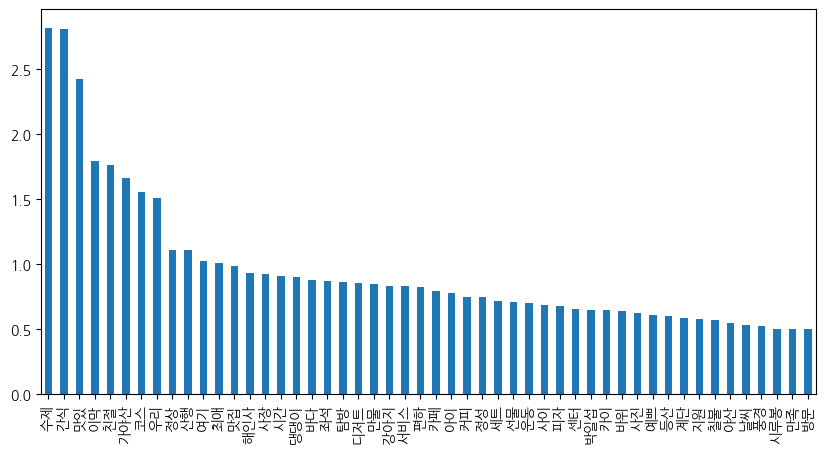

In [80]:
plt.figure(figsize=(10,5))
# plt.title('TF-IDF 가중치 합')
df_x_vect.sum().nlargest(50).plot.bar()
plt.show()

* LDA(LatentDirichletAllocation) 토픽모델링

In [81]:
from sklearn.decomposition import LatentDirichletAllocation
LDA_model = LatentDirichletAllocation(n_components=3, random_state=2024)
W = LDA_model.fit_transform(df_x_vect)

In [82]:
W

array([[0.03056581, 0.93885949, 0.0305747 ],
       [0.03982613, 0.92046677, 0.0397071 ],
       [0.02982419, 0.93927286, 0.03090295],
       [0.03455947, 0.93101653, 0.03442401],
       [0.03405761, 0.93205443, 0.03388796],
       [0.03920399, 0.92185691, 0.0389391 ],
       [0.91075313, 0.04928298, 0.03996389],
       [0.03314101, 0.93408317, 0.03277582],
       [0.03931923, 0.92157442, 0.03910634],
       [0.03850757, 0.92488764, 0.03660479],
       [0.07636668, 0.82935305, 0.09428027],
       [0.08638   , 0.81995243, 0.09366757],
       [0.08436428, 0.2591832 , 0.65645252],
       [0.14082144, 0.14279575, 0.71638281],
       [0.14099624, 0.71790649, 0.14109727],
       [0.08349305, 0.5741166 , 0.34239035],
       [0.12401043, 0.12398308, 0.75200649],
       [0.13875902, 0.13881366, 0.72242732],
       [0.12419409, 0.12426064, 0.75154527],
       [0.12419392, 0.12446162, 0.75134446],
       [0.0992516 , 0.09819454, 0.80255386],
       [0.74200146, 0.10129672, 0.15670182],
       [0.

In [83]:
H = LDA_model.components_
H

array([[0.33370371, 0.33354167, 0.33373433, ..., 0.33350448, 0.33348533,
        0.33375942],
       [0.41726031, 0.37427316, 0.41862768, ..., 0.36878605, 0.36293625,
        0.64750884],
       [0.33368748, 0.33353128, 0.33366364, ..., 0.33351695, 0.33348037,
        0.33373842]])

In [84]:
W.shape, H.shape

((30, 3), (3, 976))

In [86]:
df_lda_W = pd.DataFrame(W)
df_lda_W['review2'] = df['review2']
df_lda_W['team'] = df['team']
df_lda_W.head(10).style.background_gradient()

,0,1,2,review2,team
0,0.030566,0.938859,0.030575,경상남도 합천군 가야면 경상북도 성주군 가천면 처 있 높이 왕봉 산 야산 예 조선팔경 대명 산 하나 년 가야산 해인사 일원 사적 명승 지정 년 월 가야산 국립 공원 지정 출처 네이버 등산 코스 주차장 백 운동 탐방 지원 센터 기골 백운암 지 성재 칠불 봉 상왕 봉정상 서성 만물 상탐 방로 백 운동 탐방 지원 센터 결정 산행 가을 깊 도로 산 넓 주차장 만차 바퀴 돌 주차 시 넘 시간 다주 차비 무료 주차장 옆 화장실 관리 주차장 주변 단풍 예쁘 물들 주차장 벗어나 상가 있 등산로 입구 포장도로 걸어가 우측 가 호텔 있 등산로 입구 가 길 단풍 멋 백 운동 야영장 입 좌측 만물 코스 탐방 예약 운영 인터넷 예약 필수 예약 하 용기 골 코스 가 만물 코스 하산 용기 골 탐방 등산 입 단풍 아름답 용기 골 등산 입 돌계단 오름길 시작 용기 골 번 다리 전경 누군가 쌓 돌탑 위 많 이 소망 돌탑 등산로 옆 자리 용기 골 등 산로 판석 깔 것 같 길 있 등산 길 단풍나무 많 눈 즐겁 정상 마지막 계곡 다리 단풍 다리 길 멋 등산길 편 단풍 산행 좋 절반 지점 정상 남 예전 백운암 있 자리 넓 계단 길 있 서성 삼 거리 왕봉 이곳 만물 코스 가 산죽 길 잠깐 휴식 하 안전 산행 기원 돌탑 다서 성재 지나 오르막 길 시작 전망 좋 사진 컷 오르막 계단 길 힘겹 봉 향하 산객 하늘 먹구름 끼 봉 정상 석가 야산 높 봉우리 봉 상왕 봉정상 상왕 봉 정상 오르 마지막 계단 오르 정상 오르 주변 경관 안내판 보이 안내판 앞쪽 우비 정 있 야산 꼭대기 있 샘 가물 물 마르 우비 정 가야산 우두산 불리 소 머리 우비 정 코 위치 해당 칠불 봉 쪽 담 가야산 우두 봉 왕봉 정상 석 산 정상부 소 머리 가야산 이름 가야산 외 우두 산설 산상 왕산 중향 산기 달산 등 여섯 가지 있 유래 중 불교 전래 이전 이름 우두 불교 전래 뒤 범어 가 소 뜻 산 불교 성지 산 이름 정착 이 관련 주봉 왕봉 상왕 열반경 부처 말 것 불교 유래 것 가야산 정상부 바위 안개 뿌옇 시야 정상 바위 앉 점심 하 시야 수 없 점심 후 커피 잔 일품 길 찍 토신 골 탐방 센터 가 암 릉 계단 길 찍 후 산길 멋있 감탄 정상 칠불 봉 사이 있 암 릉 길 사진 찍 명 소다 산길 솟 바위 찍 오르막 길 힘들 계단 길 내리막 경치 찍 그러 성재 서성 유래 만물 코스 코스 표시 국립 공원 입산 시간 지정 가 야산 험하 아름답 만물 코스 만물 코스 들어오 보이 바위 바위 옆쪽 출입 금지 표시 있 가야산 가을 풍경 담 상아 덤 야산 만물 능선 최고 전망 감상 수 있 상아 덤 백 운동 지구 암 릉 달 기암괴석 능선 길 상아 덤 유래 바위 멋 만물 전경 물상 년 경상북도 성주군 선정 성주 팔경 제경 해당 곳 물상 년 약년 간 일반인 출입 금지 원시 신비 간직 만물 기암 코끼리바위 돌고래 바위 불상 바위 두꺼비 바위 쌍둥이 바위 등 있 만물 코스 바위 명품 바위 많 바위 풍경 계단 하늘 듯 만물 코스 발걸음 볼거리 사진 명소 많 시간 지체 만물 코스 멋 짐 산행 명품 소나무 사람 형상 같 하 찍 가야산 만물 코스 힘들 둘러보 생각 바위 옆 계단 길 경치 감상 모르 상왕 봉정상 먹구름 사라지 바위 하늘 멋있 우주선 모양 바위 바위틈 돌 만물 바위 능선 길 담 가을 단풍 가 야산 능선 길 소나무 뿌리 드러내 자라 백 운동 탐방 센터 산 아래 마을 만물 코스 지체 마을 불빛 백 운동 탐방 센터 까지 석양 만물 코스 찍 산속 이상 촬영 힘들 만물 탐방 입 까지 때 시 와전 기억 남 산행 마치 오늘 산행 가야산 국립 공원 왕봉 우두 봉 칠불 봉가 야산 만물 코스 상아 덤 서성 가야산 등산 코스 야산 국립 공원 단풍,1팀
1,0.039826,0.920467,0.039707,서산 있 가야산 종주 제 편 가야산 주차장 산행 시작 상가 저수지 가야산 주 능선 삼거리 과정 능선 삼거리 가 봉 북쪽 아래 지점 있 능선 삼거리 해 미면 평화 시야 서해 보이 그림자 가 봉 북쪽 있 석문봉 옥양봉 이번 편 가 봉 내려오 과정 올리 가 봉 바위 절벽 가 봉 계단 보 가 봉 서편 절벽 가 봉 전망대 가 봉 서벽 가 망대 석문봉 옥양봉 왼쪽 끝 있 봉 우리 석문봉 오른쪽 옥양봉 상가 저수지 망대 내려다보 인증 샷 뒤 중계탑 사진 가 봉 중계탑 가깝 것 아래 사진 보 가야산 주봉 남쪽 확인 수 있 참고 사진 상가 저수지 가야산 가 중계탑 여섯 개 가 위 사진 인중 샷 찍 사진 보이 중계탑 개 사진 오른쪽 있 개 중계탑 사진 아래 가야산 주봉 가 봉 관계 설명 데 참고 좋 것 같 금북 기 맥 가야산 해발 서산 서부 산악회 가야산 가 발 여기 불편 진실 여기 해발 해발 봉 가 봉 높이 이 요위 말 바 여기 해발 일 하 야산 주봉 편의 해발 봉우리 부르 남쪽 있 중계탑 경내 있 봉우리 때문 거기 봉우리 높이 입니다 주봉 국가 주요 시설물 있 때문 일반인 출입 통제 일반 산객 정상 올라오 정상 구경 제시 대안 일반인 출입 자유 해발 지점 여기 정상 표지 석 세우 전망대 만들 산행 불편 없 것 정리 가야산 주봉 해발 중계탑 경내 있 가야산 가 봉 해발 주봉 북쪽 지점 있 위 위 상가 저수지 가야산 사진 참조 여기 있 표지 석 말 중계탑 경내 있 위 대로 경내 출입 되 여기 우리 알 넘어가 것 여기 높이 사실 알 넘어가 것 하 모르 넘어가 것 착오 없 좋 가 망대 한서 대학교 서산 캠퍼스 서산 캠퍼스 서해 앞 미면 망대 석문봉 오른쪽 위 있 봉우리 봉 있 이정표 해미 해미 해미면 한서 대학교 서산 캠퍼스 가깝 해미면 가야산 가 발 되 실제 표지 개 전망대 있 산객 가 봉 계단 석문봉 왼쪽 높 봉우리 오른쪽 옥양 봉입 구절초 구절초 미역취 야산 편 계속,1팀
2,0.029824,0.939273,0.030903,돌 명산 합천 가야산 산행 날짜 년 월 산행 코스 해인사 성보 박물관 가 야산 정상 원점 회귀 산행 들머리 네비 주소 해인사 성보 박물관 산행 난이도 산행 거리 왕복 약 산행 소요 시간 약 시간 인사 토신 골 탐방 지원 센터 가야산 정상 원점 회귀 산행 소식 없 산 백 운동 지구 만물 등산 코스 산행 일정 잡 텐데 날씨 ㅣ 백동 지구 만물 등산 코스 산행 예약 코스 기암괴석 탁트인 풍광 일품 코스 반면 해인사 토신 골 탐방 지원 센터 출발 등산 코스 등 대체 길 능선 올라가 조망 보 수 있 해인사 매표소 해인사 성보 박물관 주차장 도착 장시간 달려오 피곤 하 배 때 김밥 간식 체력 보충 정상 먹 막걸리 비 것 같 안개 날씨 새벽 비 연두 빛 해인사 길 걷 몸 마음 건강 듯 일주문 앞 봉황문 등지 멋 길 부처 오 날 대비 연등 축제 행사 준비 중생 소원 것 같 분위기 ㅣ 합천 해인 사법 보종 인사 불보 사찰 통도사 승보 사찰 송광사 더불 한국 삼 대 사 찰 해인사 한국 화엄종 근본 도량 우리 민족 믿음 총화 팔만대장경 모시 사 칠 참조 팔만대장경 등산 전 인사 팔만대장경 구경 본격 등산 코스 이동 토신 골 탐방 지원 센터 토신 골 탐방 지원 센터 여기 상왕 봉 시간 올라가 연두색 물감 듯 숲 힐링 등산 길 옆 길 죽 조릿대 길 걷 눈썰미 좋 시온 눈 더덕 향 진하 좋 언저리 등 길 좋 남부 지방 날씨 얼레지 꽃 씨방 산 철쭉꽃 정도 템포 쉬 정상 즘 짙 안개 기대 정상 풍광 사라 저 볼거리 없 등 석조 여래 입상 이정표 있 정상 남 둘러보 석조 여래 입상 가야산 정상 암벽 능선 구름 걷히 모습 해인사 석조 여래 입상 보물 제호 경치 전망 좋 고산 뷰 맛집 석조 여래 입상 위쪽 위치 바위 쉼터 구름 사이 보이 주변 풍광 잠시 뒤편 정상 부 보 구름 휘감 연출 역동 가야산 모습 보 날씨 맑 날 수 없 찰나 순간 사진 담 암벽 주변 낙석 위험 돌아가 데크 다리 천 대 사방 곳 사람 듯 바람 거세 불 나 천 고지 쉽 산행 천 대 가 명소 ㅣ 봉천대 하늘 기우제 지내 곳 가야산 꼭대기 곳 있 개울물 차갑 초목 구름 정성 하 뇌우 산봉우리 일어나 산 높 구름 정상 주변 조망 없 나름 보이 만큼 해인사 길 백 운동 탐방 지원 센터 길 왕봉 정상 가 삼거리 이정표 가야산 마지막 정상 계단 통천 계단 것 같 분위기 해인사 왕봉 백 대 명산 합천 가야산 상황봉 인증

In [87]:
df_lda_topic = pd.DataFrame(H, columns=tfidfvect.get_feature_names_out())
df_lda_topic.style.background_gradient()

<Axes: >

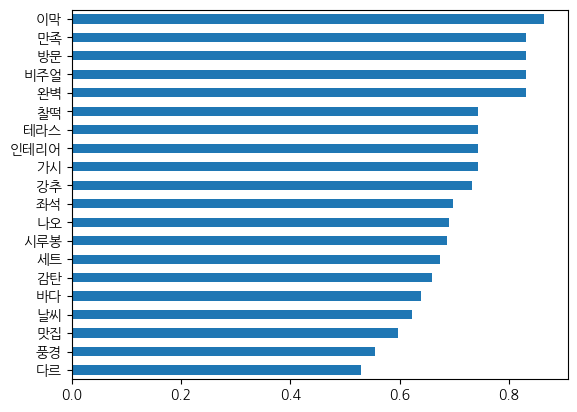

In [88]:
df_lda_topic.loc[0].nlargest(20).sort_values(ascending=True).plot.barh()

<Axes: >

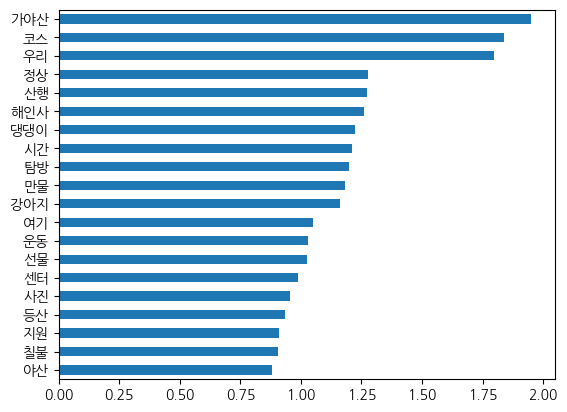

In [89]:
df_lda_topic.loc[1].nlargest(20).sort_values(ascending=True).plot.barh()

<Axes: >

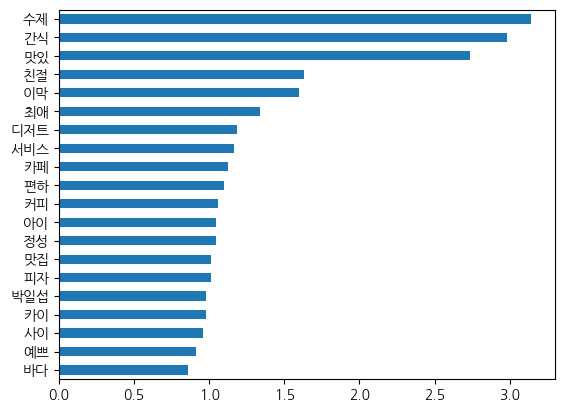

In [90]:
df_lda_topic.loc[2].nlargest(20).sort_values(ascending=True).plot.barh()